# Usability test of WYRED Platform

<h3>Importation of the required libraries and reading of the CSV file that contains all the questionnaire responses</h3>

In [1]:
import pandas as pd
import numpy as np
from termcolor import colored
from scipy import stats
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1000

df = pd.read_csv('results-survey.csv', sep=',')

In [2]:
df

,ID de respuesta,Fecha de envío,Última página,Lenguaje inicial,Fecha de inicio,Fecha de la última acción,Año de nacimiento,Indica tu género,¿Dónde has nacido?,¿Dónde has nacido? [Otro],¿Dónde nació tu padre?,¿Dónde nació tu padre? [Otro],¿Dónde nació tu madre?,¿Dónde nació tu madre? [Otro],¿Qué idioma se habla principalmente en tu familia?,¿Qué idioma se habla principalmente en tu familia? [Otro],"¿Tienes alguna enfermedad, problema de salud o discapacidad relacionada con la vista?","¿Tienes alguna enfermedad, problema de salud o discapacidad relacionada con la vista? [Otro]",¿Has sido facilitador/a en la plataforma WYRED?,¿En qué idiomas has utilizado la plataforma? [Alemán],¿En qué idiomas has utilizado la plataforma? [Español],¿En qué idiomas has utilizado la plataforma? [Hebreo],¿En qué idiomas has utilizado la plataforma? [Inglés],¿En qué idiomas has utilizado la plataforma? [Italiano],¿En qué idiomas has utilizado la plataforma? [Turco],"Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Creo que me gustaría utilizar esta plataforma frecuentemente]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Encuentro la plataforma innecesariamente compleja]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Pienso que la plataforma es fácil de usar]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Creo que necesitaría soporte técnico para hacer uso de la plataforma]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Encuentro las diversas funciones de la plataforma bastante bien integradas]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [He encontrado demasiada inconsistencia en la plataforma]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Creo que la mayoría de la gente podría aprender a usar la plataforma rápidamente]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [He encontrado la plataforma complicada de usar]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [La plataforma me transmite confianza y seguridad]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Neces

<h3>Cleaning the dataset</h3>
<ul>
<li>1) Drop the rows that have NaN values on the column "Fecha de envío" (Sent date of the questionnaire), because these rows will not cointain any valuable responses.</li>
<li>2) Rename the columns to reduce verbosity in column names</li>
<li>3) Substract the valuable columns for the analysis (discarding all the questionnaire metadata)</li>
</ul>

In [3]:
df_clean = df.dropna(subset=['Fecha de envío'])

df_clean.columns.values[1] = 'Date_SUS'
df_clean.columns.values[6] = 'Birthdate'
df_clean.columns.values[7] = 'Gender'
df_clean.columns.values[8] = 'Birthplace'
df_clean.columns.values[9] = 'Birthplace_Other'
df_clean.columns.values[10] = 'Birthplace_Father'
df_clean.columns.values[11] = 'Birthplace_Father_Other'
df_clean.columns.values[12] = 'Birthplace_Mother'
df_clean.columns.values[13] = 'Birthplace_Mother_Other'
df_clean.columns.values[14] = 'Family_Language'
df_clean.columns.values[15] = 'Family_Language_Other'
df_clean.columns.values[16] = 'Sight_Problems'
df_clean.columns.values[17] = 'Sight_Problems_Other'
df_clean.columns.values[18] = 'WYRED_Facilitator'
df_clean.columns.values[19] = 'WYRED_Language_German'
df_clean.columns.values[20] = 'WYRED_Language_Spanish'
df_clean.columns.values[21] = 'WYRED_Language_Hebrew'
df_clean.columns.values[22] = 'WYRED_Language_English'
df_clean.columns.values[23] = 'WYRED_Language_Italian'
df_clean.columns.values[24] = 'WYRED_Language_Turkish'
df_clean.columns.values[25] = 'SUS_1'
df_clean.columns.values[26] = 'SUS_2'
df_clean.columns.values[27] = 'SUS_3'
df_clean.columns.values[28] = 'SUS_4'
df_clean.columns.values[29] = 'SUS_5'
df_clean.columns.values[30] = 'SUS_6'
df_clean.columns.values[31] = 'SUS_7'
df_clean.columns.values[32] = 'SUS_8'
df_clean.columns.values[33] = 'SUS_9'
df_clean.columns.values[34] = 'SUS_10'
df_clean.columns.values[35] = 'Comments'

df_clean = df_clean[['Date_SUS', 'Birthdate', 'Gender', 'Birthplace', 'Birthplace_Other', 'Birthplace_Father', 'Birthplace_Father_Other',
         'Birthplace_Mother', 'Birthplace_Mother_Other', 'Family_Language', 'Family_Language_Other',
         'Sight_Problems', 'Sight_Problems_Other', 'WYRED_Facilitator', 'WYRED_Language_German',
         'WYRED_Language_Spanish', 'WYRED_Language_Hebrew', 'WYRED_Language_English', 'WYRED_Language_Italian',
         'WYRED_Language_Turkish', 'SUS_1', 'SUS_2', 'SUS_3', 'SUS_4', 'SUS_5', 'SUS_6', 'SUS_7', 'SUS_8',
         'SUS_9', 'SUS_10', 'Comments']]

df_sus = df_clean.copy()

In [4]:
df_sus

,Date_SUS,Birthdate,Gender,Birthplace,Birthplace_Other,Birthplace_Father,Birthplace_Father_Other,Birthplace_Mother,Birthplace_Mother_Other,Family_Language,Family_Language_Other,Sight_Problems,Sight_Problems_Other,WYRED_Facilitator,WYRED_Language_German,WYRED_Language_Spanish,WYRED_Language_Hebrew,WYRED_Language_English,WYRED_Language_Italian,WYRED_Language_Turkish,SUS_1,SUS_2,SUS_3,SUS_4,SUS_5,SUS_6,SUS_7,SUS_8,SUS_9,SUS_10,Comments
2,2017-12-19 14:03:36,1998.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Otro,Astigmatismo,No,No,Sí,No,No,No,No,4.0,3.0,4.0,4.0,3.0,2.0,5.0,1.0,3.0,5.0,NaN
5,2017-12-19 14:06:03,1999.0,Masculino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Miopía degenerativa,NaN,No,No,Sí,No,No,No,No,2.0,4.0,2.0,3.0,3.0,3.0,2.0,4.0,3.0,3.0,NaN
7,2017-12-19 14:11:25,1997.0,Femenino,Belgium – Flemish Community,NaN,Belgium – Flemish Community,NaN,Belgium – Flemish Community,NaN,Dutch,NaN,NaN,NaN,No,No,Sí,No,No,No,No,3.0,3.0,5.0,2.0,3.0,2.0,4.0,1.0,4.0,1.0,NaN
8,2017-12-19 14:12:00,1995.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Otro,Astigmatismo,No,No,No,No,Sí,No,No,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,Creo que la plataforma tendría que estar operativa en todos los idiomas.
9,2017-12-19 14:14:58,1994.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Otro,Astigmatismo e hipermetropía,No,No,No,No,Sí,No,No,2.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,4.0,Que no de problemas a la hora de introducir la contraseña
10,2017-12-19 14:10:54,1999.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,NaN,NaN,No,No,No,No,Sí,No,No,2.0,3.0,4.0,4.0,2.0,2.0,5.0,2.0,4.0,1.0,NaN
11,2017-12-19 14:13:30,1996.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Otro,Astigmatismo e hipermetropía,No,No,No,No,Sí,No,No,2.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,2.0,2.0,"Es una plataforma difícil de comenzar a usar, después es muy intuitiva pero hasta el momento en que empiezas a usar el foro es fácil"
12,2017-12-19 14:16:40,1995.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Catalan,NaN,Otro,Miopía y astigmatismo,Sí,No,Sí,No,No,No,No,3.0,4.0,2.0,3.0,3.0,3.0,2.0,4.0,3.0,4.0,"Me gustaría que si escoges totalmente el idioma de español, estuviera totalmente en español y no mezclando el inglés."
13,2017-12-19 14:16:00,1999.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Miopía degenerativa,NaN,No,No,Sí,No,No,No,No,3.0,1.0,4.0,1.0,4.0,1.0,5.0,1.0,4.0,1.0,NaN
14,2017-12-19 14:24:32,1997.0,Femenino,China,NaN,China,NaN,China,NaN,Chinese,NaN,NaN,NaN,Sí,No,Sí,No,No,No,No,4.0,1.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4.0,NaN


<h3>Sociodemographic results</h3>

<h4>Gender</h4>

Femenino = Female<br>
Masculino = Male

In [5]:
print "Count:"
print df_sus['Gender'].value_counts()

print "\nPercentage:"
print df_sus['Gender'].value_counts(normalize=True) * 100

Count:
Femenino     37
Masculino     6
Name: Gender, dtype: int64

Percentage:
Femenino     86.046512
Masculino    13.953488
Name: Gender, dtype: float64


<h4>Age</h4>

In [6]:
df_sus['Age'] = 2018 - df_sus['Birthdate']
print "Count:"
print df_sus['Age'].value_counts()

print "\nPercentage:"
print df_sus['Age'].value_counts(normalize=True) * 100

print "\nAverage age:"
print df_sus['Age'].mean()

Count:
19.0    19
22.0     6
23.0     5
21.0     5
24.0     4
20.0     3
26.0     1
Name: Age, dtype: int64

Percentage:
19.0    44.186047
22.0    13.953488
23.0    11.627907
21.0    11.627907
24.0     9.302326
20.0     6.976744
26.0     2.325581
Name: Age, dtype: float64

Average age:
20.8139534884


<h4>Birthplace</h4>

In [7]:
print "Count:"
print df_sus['Birthplace'].value_counts()

print "\nPercentage:"
print df_sus['Birthplace'].value_counts(normalize=True) * 100

Count:
Spain                          40
Netherlands                     1
Belgium – Flemish Community     1
China                           1
Name: Birthplace, dtype: int64

Percentage:
Spain                          93.023256
Netherlands                     2.325581
Belgium – Flemish Community     2.325581
China                           2.325581
Name: Birthplace, dtype: float64


<h4>Platform language used</h4>

In [8]:
print "Count Spanish:"
print df_sus['WYRED_Language_Spanish'].value_counts()
print "Count English:"
print df_sus['WYRED_Language_English'].value_counts()

print "\nPercentage Spanish:"
print df_sus['WYRED_Language_Spanish'].value_counts(normalize=True) * 100
print "\nPercentage English:"
print df_sus['WYRED_Language_English'].value_counts(normalize=True) * 100

Count Spanish:
Sí    35
No     8
Name: WYRED_Language_Spanish, dtype: int64
Count English:
No    33
Sí    10
Name: WYRED_Language_English, dtype: int64

Percentage Spanish:
Sí    81.395349
No    18.604651
Name: WYRED_Language_Spanish, dtype: float64

Percentage English:
No    76.744186
Sí    23.255814
Name: WYRED_Language_English, dtype: float64


<h4>Sight diseases</h4>

Ninguna = None<br>
Otro = Other<br>
Miopía degenerativa = Degenerative myopia<br>
Astigmatismo = Astigmatism<br>
Hipermetropía = Hyperopia

In [9]:
df_sus['Sight_Problems'].fillna('Ninguna', inplace=True)
print "Count:"
print df_sus['Sight_Problems'].value_counts()
print "\nCount of other sight diseases:"
print df_sus['Sight_Problems_Other'].value_counts()


print "\nPercentage:"
print df_sus['Sight_Problems'].value_counts(normalize=True) * 100

Count:
Ninguna                30
Otro                    7
Miopía degenerativa     6
Name: Sight_Problems, dtype: int64

Count of other sight diseases:
Astigmatismo                    2
Miopía y astigmatismo           2
Astigmatismo e hipermetropía    2
Hipermetropia                   1
Name: Sight_Problems_Other, dtype: int64

Percentage:
Ninguna                69.767442
Otro                   16.279070
Miopía degenerativa    13.953488
Name: Sight_Problems, dtype: float64


<h3>SUS Score calculation for each participant</h3>
<br>
"To calculate the SUS score, first sum the score contributions from each item. Each item's
score contribution will range from 0 to 4. <br>For items 1,3,5,7,and 9 the score contribution is the
scale position minus 1. <br>For items 2,4,6,8 and 10, the contribution is 5 minus the scale position.
<br>Multiply the sum of the scores by 2.5 to obtain the overall value of SUS.
SUS scores have a range of 0 to 100." 
<br><br>[Brooke, J. (1996). SUS-A quick and dirty usability scale. Usability evaluation in industry, 189(194), 4-7]

In [10]:
df_sus[['SUS_1', 'SUS_3', 'SUS_5', 'SUS_7', 'SUS_9']] -= 1 
df_sus[['SUS_2', 'SUS_4', 'SUS_6', 'SUS_8', 'SUS_10']] = 5 - df_sus[['SUS_2', 'SUS_4', 'SUS_6', 'SUS_8', 'SUS_10']].copy()

df_sus['SUS_TOTAL'] = 2.5 * (df_sus['SUS_1'] + df_sus['SUS_2'] + df_sus['SUS_3'] + df_sus['SUS_4'] + df_sus['SUS_5'] + df_sus['SUS_6'] + df_sus['SUS_7'] + df_sus['SUS_8'] + df_sus['SUS_9'] + df_sus['SUS_10'])

<h3>SUS Score mean</h3>
<br>
According to the literature, this value (65.23) falls close to the 50th percentile (which means that the system has an acceptable level of usability) as the average score of SUS is 68.00 
<br>[Sauro, J. (2011). A practical guide to the System Usability Scale: Background, benchmarks & best practices. Denver, CO: Measuring Usability LLC].

<br>
On the other hand, the value obtained also falls between the "OK" and "Good" ranges of the categorical scale made by Bangor. 
<br>[Bangor, A., Kortum, P., & Miller, J. (2009). Determining What Individual SUS Scores Mean: Adding an Adjective Rating Scale. Journal of Usability Studies, 4(3), 114-123]

In [11]:
print "Mean: " + str(df_sus['SUS_TOTAL'].mean())

Mean: 65.2325581395


<h3>The confidence interval it is also calculated for a more deeper analysis</h3>

In [12]:
from scipy import stats
from math import sqrt

std = df_sus['SUS_TOTAL'].std()
print "Standard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "\n\nConfidence interval (95%): " + str(df_sus['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus['SUS_TOTAL'].mean() + margin_error)

Standard deviation: 18.0262205971
Degrees of freedom: 42
T-critical value (0.05, 42): 2.0180816971

Margin of error: 5.54765183386


Confidence interval (95%): 59.6849063057 to 70.7802099734


<h3>Some considerations</h3>

A technical error was found on the platform during the system testing. It was solved on 27-12-2017.
<br><br>
A total of 30 participants tested the system before the fix, 2 of them pointing out the problem in the "Comments" section. For this set of users, the SUS score is lower (64.67).
<br><br>
The 13 participants that tested the system after the fix scored it better (with an average score of 66.54).

In [13]:
df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].mean()

64.666666666666671

In [14]:
df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].mean()

66.538461538461533

<h3>Confidence interval</h3>

In [15]:
from scipy import stats
from math import sqrt

print "Confidence interval before the fix\n\n"
std = df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].std()
print "Standard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "\n\nConfidence interval (95%): " + str(df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].mean() + margin_error)

Confidence interval before the fix


Standard deviation: 17.053836323
Degrees of freedom: 29
T-critical value (0.05, 29): 2.04522964213

Margin of error: 6.36800713829


Confidence interval (95%): 58.2986595284 to 71.034673805


In [16]:
from scipy import stats
from math import sqrt

print "Confidence interval after the fix\n\n"
std = df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].std()
print "Standard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "\n\nConfidence interval (95%): " + str(df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].mean() + margin_error)

Confidence interval after the fix


Standard deviation: 20.7800600922
Degrees of freedom: 12
T-critical value (0.05, 12): 2.17881282966

Margin of error: 12.5572646375


Confidence interval (95%): 53.981196901 to 79.095726176


<h3>Learnability and Usability</h3>
<br>
Although the SUS was originally developed to provide a single score to indicate the (perceived) usability of a system [Brooke, J. (2013). SUS: a retrospective. Journal of usability studies, 8(2), 29-40.], subsequent studies pointed out the two-dimensional nature of this scale [Lewis, J. R., & Sauro, J. (2009, July). The factor structure of the system usability scale. In International conference on human centered design (pp. 94-103). Springer, Berlin, Heidelberg.].
<br><br>
Learnability can be calculated through items 4 and 10 (following the same scoring method as the original SUS score) but instead of multiplying it by 2.5 (to obtain a 0-100 scale from a 0-40 scale), we need to multiply the results by 12.5 (to obtain a 0-100 scale from a 0-8 scale).
<br><br>
In the same way, we can calculate usability with the remaining items, multiplying them by 3.125 to (to obtain a 0-100 scale from a 0-32 scale).

In [17]:
df_sus['Learnability'] = 12.5 * (df_sus['SUS_4'] + df_sus['SUS_10'])
df_sus['Usability'] = 3.125 * (df_sus['SUS_1'] + df_sus['SUS_2'] + df_sus['SUS_3'] + df_sus['SUS_5'] + df_sus['SUS_6'] + df_sus['SUS_7'] + df_sus['SUS_8'] + df_sus['SUS_9'])

The previous interpretation is applicable. As the results show, learnability (66.28) is more close to the SUS average than usability (64.97), but both values are close to the 50th percentile and can be considered acceptable.

In [18]:
df_sus['Learnability'].mean()

66.279069767441854

In [19]:
df_sus['Usability'].mean()

64.970930232558146

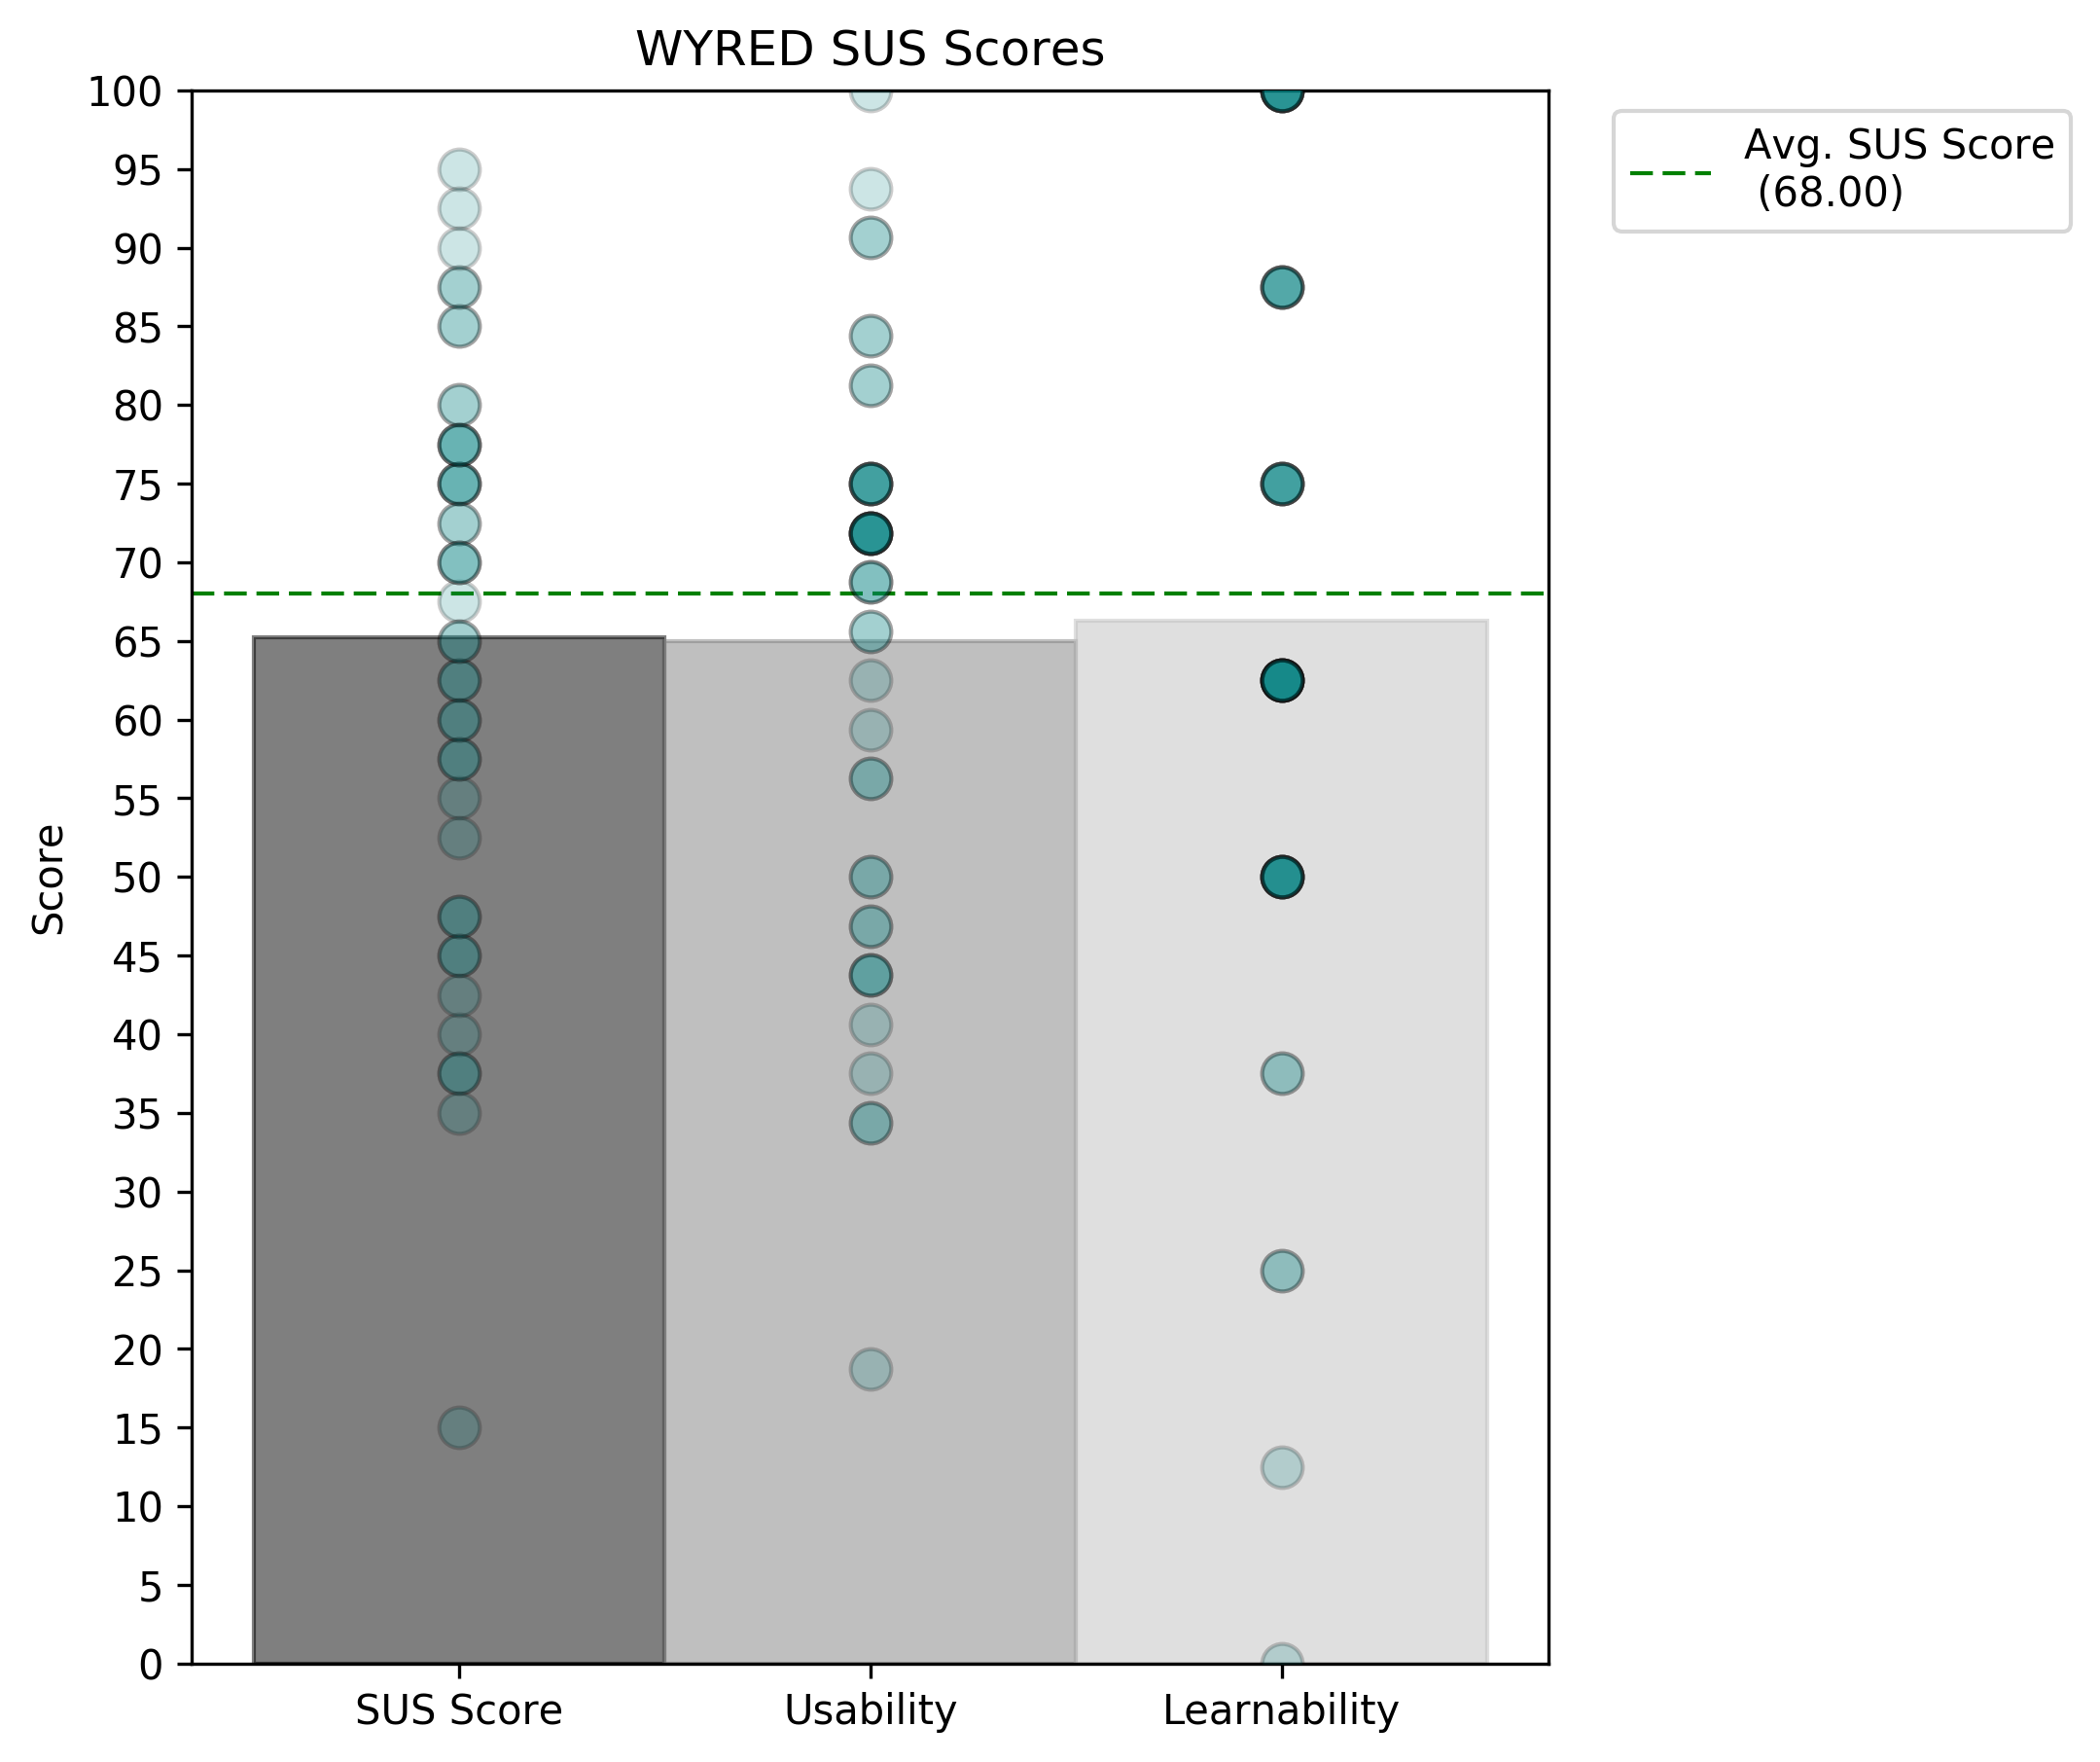

In [20]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(6, 7), dpi=300, facecolor='w', edgecolor='k')
 
x = ('SUS Score', 'Usability', 'Learnability')
y_pos = [3,3.5,4] 
score = [65.23,64.97,66.28]

barlist = plt.bar(y_pos, score, align='center', alpha=0.5, width=[0.5, 0.5, 0.5])
barlist[0].set_color('black')
barlist[1].set_color('grey')
barlist[2].set_color('silver')

plt.xticks(y_pos, x)
plt.ylim([0, 100])
plt.ylabel('Score')
plt.yticks(np.arange(0, 101, 5.0))
plt.axhline(68, color='g', linestyle='dashed', linewidth=1, label="Avg. SUS Score\n (68.00)")
plt.legend(bbox_to_anchor=(1.4, 1.0))

plt.scatter([3] * df_sus['SUS_TOTAL'].shape[0], df_sus['SUS_TOTAL'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)
plt.scatter([3.5] * df_sus['Usability'].shape[0], df_sus['Usability'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)
plt.scatter([4] * df_sus['Learnability'].shape[0], df_sus['Learnability'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)

plt.title('WYRED SUS Scores')
 
plt.show()

<h3>Learnability and Usability (taking into account the technical error)</h3>

<h4>Learnability and Usability results before the system fix</h4>

In [21]:
print "Learnability: " + str(df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['Learnability'].mean())
print "Usability: " + str(df_sus[(df_sus['Date_SUS'] < '2017-12-27')]['Usability'].mean())

Learnability: 65.4166666667
Usability: 64.4791666667


<h4>Learnability and Usability results after the system fix</h4>

In [22]:
print "Learnability: " + str(df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['Learnability'].mean())
print "Usability: " + str(df_sus[(df_sus['Date_SUS'] >= '2017-12-27')]['Usability'].mean())

Learnability: 68.2692307692
Usability: 66.1057692308


<h3>Comments</h3>

As it has been said before, the negative comments pointed out the technical error and other issues like the language of the platform ('it should be operative in all languages' and 'if you choose one language the platform should be completely in that language') and the initial questionnaire to access the system ('unnecessary/awkward questions'). 
<br>
In addition, some users pointed out that the platform is difficult to use at the beggining, but then it becomes more easy and intuitive.
<br><br>
In the majority of comments, participants perceive it as a simple, helpful and useful platform.

In [23]:
def print_comments_score(x):
    global all_comments
    if x.Comments is not np.nan:
        if x.SUS_TOTAL >= 68:
            color = 'green'
        else:
            color = 'red'
        print colored(str(x.SUS_TOTAL) + ": \n" + str(x.Comments), color)
        print "\n"
        
df_sus.apply(print_comments_score, axis=1)
print

55.0: 
Creo que la plataforma tendría que estar operativa en todos los idiomas. 


40.0: 
Que no de problemas a la hora de introducir la contraseña


47.5: 
Es una plataforma difícil de comenzar a usar, después es muy intuitiva pero hasta el momento en que empiezas a usar el foro es fácil


37.5: 
Me gustaría que si escoges totalmente el idioma de español, estuviera totalmente en español y no mezclando el inglés. 


80.0: 
En los hilos de conversación, si deseas subir una imagen puede ser un poco lioso, en ese aspecto creo que se debería simplificar como en cualquier otra plataforma.
Por otro lado, al principio nos encontrábamos un poco perdidos pero una vez investigado ya fue muy fácil.


77.5: 
Me parece una buena forma para llegar a un acuerdo.


95.0: 
La plataforma me ha parecido muy fácil de usar, sencilla y muy práctica. Además, la considero muy útil para crear debates y que todo el mundo pueda dejar su opinión de una manera clara, directa y ordenada. 


75.0: 
Me ha parecido un

# SUS Score by sociodemographic variables

<h3>Age</h3>

In [24]:
print "Sample size (Age >= 21): " + str(df_clean[df_clean["Birthdate"] <= 1997].shape[0])
print "SUS: " + str(df_sus[df_sus["Birthdate"] <= 1997]["SUS_TOTAL"].mean())

std = df_sus[df_sus["Birthdate"] <= 1997]['SUS_TOTAL'].std()
print "\nStandard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus[df_sus["Birthdate"] <= 1997]['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus[df_sus["Birthdate"] <= 1997]['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus[df_sus["Birthdate"] <= 1997]['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus[df_sus["Birthdate"] <= 1997]['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "Confidence interval (95%): " + str(df_sus[df_sus["Birthdate"] <= 1997]['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus[df_sus["Birthdate"] <= 1997]['SUS_TOTAL'].mean() + margin_error)

print "\n\nLearnability: " + str(df_sus[df_sus["Birthdate"] <= 1997]["Learnability"].mean())
print "Usability: " + str(df_sus[df_sus["Birthdate"] <= 1997]["Usability"].mean())

Sample size (Age >= 21): 21
SUS: 61.0714285714

Standard deviation: 20.5634905319
Degrees of freedom: 20
T-critical value (0.05, 20): 2.08596344727

Margin of error: 9.36038866636
Confidence interval (95%): 51.7110399051 to 70.4318172378


Learnability: 62.5
Usability: 60.7142857143


In [25]:
print "Sample size (Age < 21): " + str(df_clean[df_clean["Birthdate"] > 1997].shape[0])
print "SUS: " + str(df_sus[df_sus["Birthdate"] > 1997]["SUS_TOTAL"].mean())

std = df_sus[df_sus["Birthdate"] > 1997]['SUS_TOTAL'].std()
print "\nStandard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus[df_sus["Birthdate"] > 1997]['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus[df_sus["Birthdate"] > 1997]['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus[df_sus["Birthdate"] > 1997]['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus[df_sus["Birthdate"] > 1997]['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "Confidence interval (95%): " + str(df_sus[df_sus["Birthdate"] > 1997]['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus[df_sus["Birthdate"] > 1997]['SUS_TOTAL'].mean() + margin_error)

print "\nLearnability: " + str(df_sus[df_sus["Birthdate"] > 1997]["Learnability"].mean())
print "Usability: " + str(df_sus[df_sus["Birthdate"] > 1997]["Usability"].mean())

Sample size (Age < 21): 22
SUS: 69.2045454545

Standard deviation: 14.6056570017
Degrees of freedom: 21
T-critical value (0.05, 21): 2.07961384473

Margin of error: 6.47578553103
Confidence interval (95%): 62.7287599235 to 75.6803309856

Learnability: 69.8863636364
Usability: 69.0340909091


<h3>Sight problems</h3>

In [26]:
df_sus['Sight_Problems'].fillna('Ninguna', inplace=True)
print "Sample size (Sight problems = None): " + str(df_sus[df_sus["Sight_Problems"] == "Ninguna"].shape[0])
print "SUS: " + str(df_sus[df_sus["Sight_Problems"] == "Ninguna"]["SUS_TOTAL"].mean())

std = df_sus[df_sus["Sight_Problems"] == "Ninguna"]['SUS_TOTAL'].std()
print "\nStandard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus[df_sus["Sight_Problems"] == "Ninguna"]['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus[df_sus["Sight_Problems"] == "Ninguna"]['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus[df_sus["Sight_Problems"] == "Ninguna"]['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus[df_sus["Sight_Problems"] == "Ninguna"]['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "Confidence interval (95%): " + str(df_sus[df_sus["Sight_Problems"] == "Ninguna"]['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus[df_sus["Sight_Problems"] == "Ninguna"]['SUS_TOTAL'].mean() + margin_error)

print "\nLearnability: " + str(df_sus[df_sus["Sight_Problems"] == "Ninguna"]["Learnability"].mean())
print "Usability: " + str(df_sus[df_sus["Sight_Problems"] == "Ninguna"]["Usability"].mean())

Sample size (Sight problems = None): 30
SUS: 67.8333333333

Standard deviation: 18.1199705666
Degrees of freedom: 29
T-critical value (0.05, 29): 2.04522964213

Margin of error: 6.76610820743
Confidence interval (95%): 61.0672251259 to 74.5994415408

Learnability: 69.5833333333
Usability: 67.3958333333


In [27]:
print "Sample size (Any sight problems): " + str(df_sus[df_sus["Sight_Problems"] != "Ninguna"].shape[0])

print "SUS: " + str(df_sus[df_sus["Sight_Problems"] != "Ninguna"]["SUS_TOTAL"].mean())

std = df_sus[df_sus["Sight_Problems"] != "Ninguna"]['SUS_TOTAL'].std()
print "\nStandard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus[df_sus["Sight_Problems"] != "Ninguna"]['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus[df_sus["Sight_Problems"] != "Ninguna"]['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus[df_sus["Sight_Problems"] != "Ninguna"]['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus[df_sus["Sight_Problems"] != "Ninguna"]['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "Confidence interval (95%): " + str(df_sus[df_sus["Sight_Problems"] != "Ninguna"]['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus[df_sus["Sight_Problems"] != "Ninguna"]['SUS_TOTAL'].mean() + margin_error)

print "\nLearnability: " + str(df_sus[df_sus["Sight_Problems"] != "Ninguna"]["Learnability"].mean())
print "Usability: " + str(df_sus[df_sus["Sight_Problems"] != "Ninguna"]["Usability"].mean())

Sample size (Any sight problems): 13
SUS: 59.2307692308

Standard deviation: 16.9676351041
Degrees of freedom: 12
T-critical value (0.05, 12): 2.17881282966

Margin of error: 10.2534392744
Confidence interval (95%): 48.9773299563 to 69.4842085052

Learnability: 58.6538461538
Usability: 59.375


<h3>WYRED Facilitator</h3>

In [28]:
print "Sample size (Facilitator): " + str(df_sus[df_sus["WYRED_Facilitator"] == "Sí"].shape[0])

print "SUS: " + str(df_sus[df_sus["WYRED_Facilitator"] == "Sí"]["SUS_TOTAL"].mean())

std = df_sus[df_sus["WYRED_Facilitator"] == "Sí"]['SUS_TOTAL'].std()
print "\nStandard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus[df_sus["WYRED_Facilitator"] == "Sí"]['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus[df_sus["WYRED_Facilitator"] == "Sí"]['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus[df_sus["WYRED_Facilitator"] == "Sí"]['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus[df_sus["WYRED_Facilitator"] == "Sí"]['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "Confidence interval (95%): " + str(df_sus[df_sus["WYRED_Facilitator"] == "Sí"]['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus[df_sus["WYRED_Facilitator"] == "Sí"]['SUS_TOTAL'].mean() + margin_error)

print "\nLearnability: " + str(df_sus[df_sus["WYRED_Facilitator"] == "Sí"]["Learnability"].mean())
print "Usability: " + str(df_sus[df_sus["WYRED_Facilitator"] == "Sí"]["Usability"].mean())

Sample size (Facilitator): 11
SUS: 61.8181818182

Standard deviation: 17.5745166751
Degrees of freedom: 10
T-critical value (0.05, 10): 2.22813885196

Margin of error: 11.8067209538
Confidence interval (95%): 50.0114608643 to 73.624902772

Learnability: 62.5
Usability: 61.6477272727


In [31]:
print "Sample size (Not facilitator): " + str(df_sus[df_sus["WYRED_Facilitator"] == "No"].shape[0])

print "SUS: " + str(df_sus[df_sus["WYRED_Facilitator"] == "No"]["SUS_TOTAL"].mean())

std = df_sus[df_sus["WYRED_Facilitator"] == "No"]['SUS_TOTAL'].std()
print "\nStandard deviation: " + str(std)
print "Degrees of freedom: " + str(df_sus[df_sus["WYRED_Facilitator"] == "No"]['SUS_TOTAL'].shape[0] - 1)
t_crit = stats.t.ppf(1-0.025, df_sus[df_sus["WYRED_Facilitator"] == "No"]['SUS_TOTAL'].shape[0] - 1)
print "T-critical value (0.05, " + str(df_sus[df_sus["WYRED_Facilitator"] == "No"]['SUS_TOTAL'].shape[0] - 1) + "): " + str(t_crit)

margin_error = t_crit * (std/sqrt(df_sus[df_sus["WYRED_Facilitator"] == "No"]['SUS_TOTAL'].shape[0]))
print "\nMargin of error: " + str(margin_error)

print "Confidence interval (95%): " + str(df_sus[df_sus["WYRED_Facilitator"] == "No"]['SUS_TOTAL'].mean() - margin_error) + " to " + str(df_sus[df_sus["WYRED_Facilitator"] == "No"]['SUS_TOTAL'].mean() + margin_error)


print "\nLearnability: " + str(df_sus[df_sus["WYRED_Facilitator"] == "No"]["Learnability"].mean())
print "Usability: " + str(df_sus[df_sus["WYRED_Facilitator"] == "No"]["Usability"].mean())

Sample size (Not facilitator): 32
SUS: 66.40625

Standard deviation: 18.3045197574
Degrees of freedom: 31
T-critical value (0.05, 31): 2.0395134464

Margin of error: 6.59948312763
Confidence interval (95%): 59.8067668724 to 73.0057331276

Learnability: 67.578125
Usability: 66.11328125


In [33]:
non_facilitator_sus = df_sus[df_sus["WYRED_Facilitator"] == "No"]["SUS_TOTAL"].mean()
facilitator_sus = df_sus[df_sus["WYRED_Facilitator"] == "Sí"]["SUS_TOTAL"].mean()
increase = non_facilitator_sus - facilitator_sus
percentage = (increase/facilitator_sus) * 100
print "Percentage decrease: " + str(percentage) + "%"

Percentage decrease: 7.421875%


# Analysis of the responses of every SUS item

In this section, every SUS questionnaire item has been analyzed. As every item is a Likert Scale item, the frequencies of the responses of every item have been calculated and plotted, as well as some other statistics.

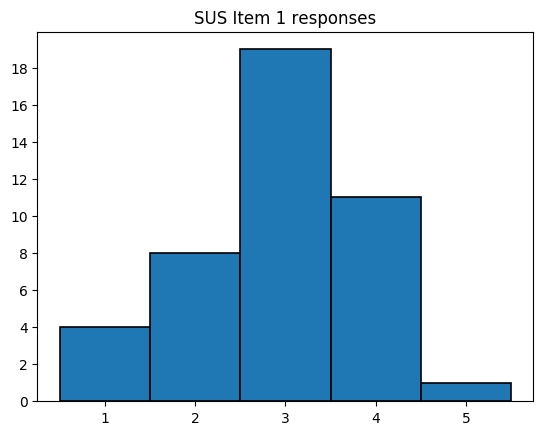

Mean: 2.93023255814


In [34]:
import matplotlib.pyplot as plt

plt.title('SUS Item 1 responses')
plt.hist(df_clean["SUS_1"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_1"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_1"].mean())

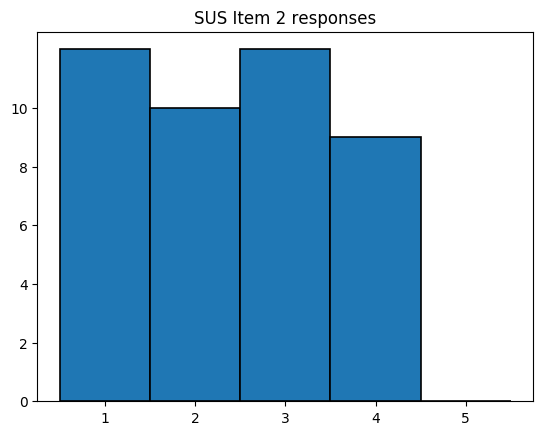

Mean: 2.41860465116


In [35]:
import matplotlib.pyplot as plt

plt.title('SUS Item 2 responses')
plt.hist(df_clean["SUS_2"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_2"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_2"].mean())

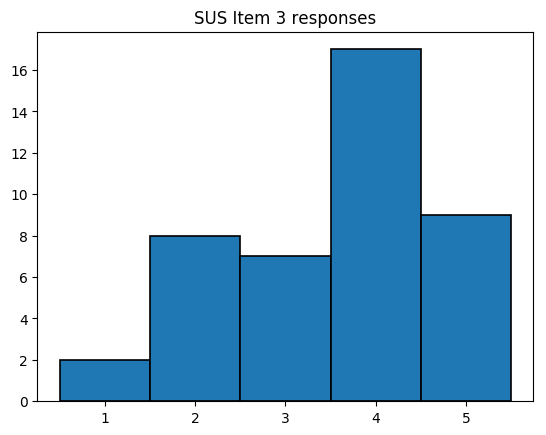

Mean: 3.53488372093


In [36]:
import matplotlib.pyplot as plt

plt.title('SUS Item 3 responses')
plt.hist(df_clean["SUS_3"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_3"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_3"].mean())

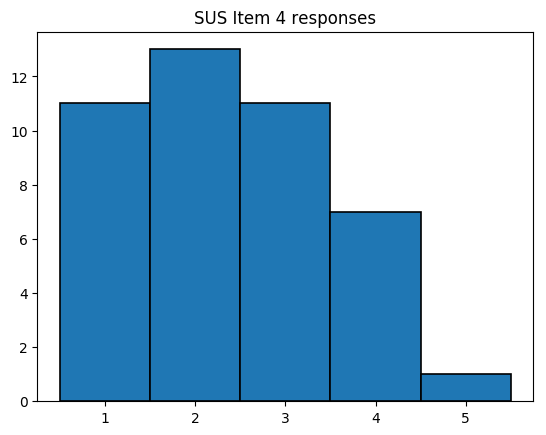

Mean: 2.39534883721


In [37]:
import matplotlib.pyplot as plt

plt.title('SUS Item 4 responses')
plt.hist(df_clean["SUS_4"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_4"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_4"].mean())

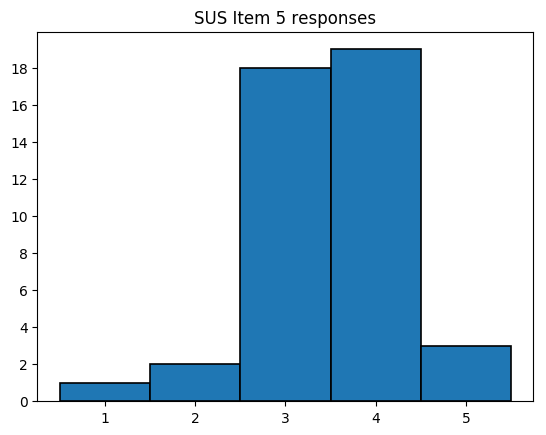

Mean: 3.48837209302


In [38]:
import matplotlib.pyplot as plt

plt.title('SUS Item 5 responses')
plt.hist(df_clean["SUS_5"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_5"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_5"].mean())

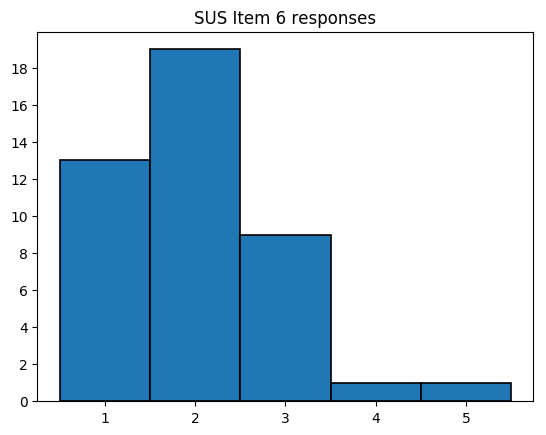

Mean: 2.02325581395


In [39]:
import matplotlib.pyplot as plt

plt.title('SUS Item 6 responses')
plt.hist(df_clean["SUS_6"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_6"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_6"].mean())

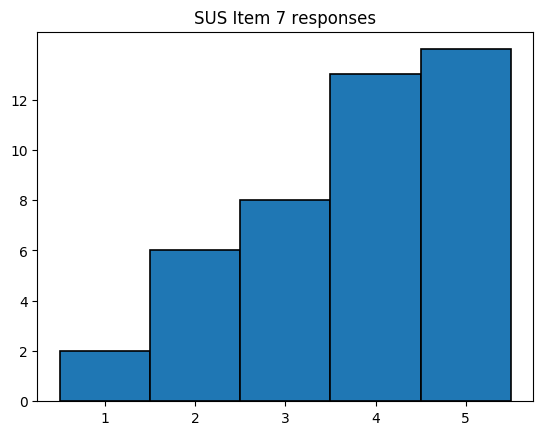

Mean: 3.72093023256


In [40]:
import matplotlib.pyplot as plt

plt.title('SUS Item 7 responses')
plt.hist(df_clean["SUS_7"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_7"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_7"].mean())

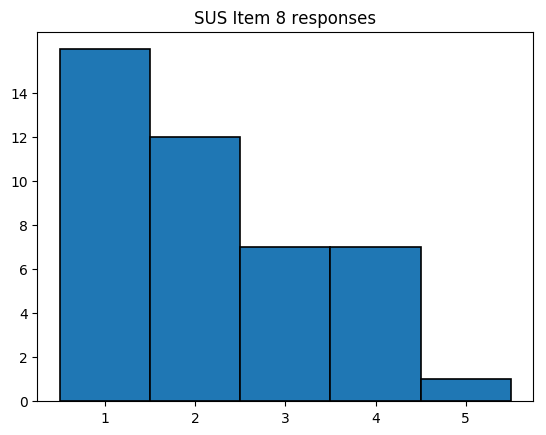

Mean: 2.18604651163


In [41]:
import matplotlib.pyplot as plt

plt.title('SUS Item 8 responses')
plt.hist(df_clean["SUS_8"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_8"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_8"].mean())

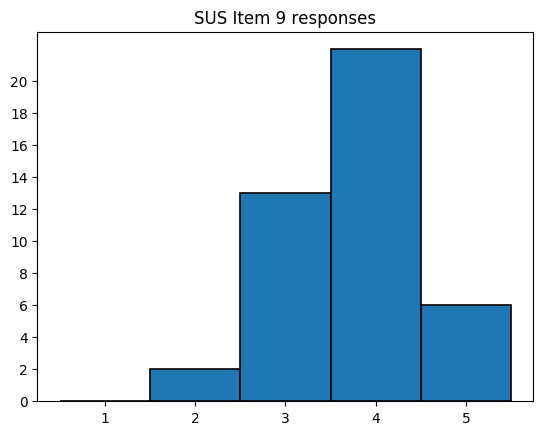

Mean: 3.74418604651


In [42]:
import matplotlib.pyplot as plt

plt.title('SUS Item 9 responses')
plt.hist(df_clean["SUS_9"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_9"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_9"].mean())

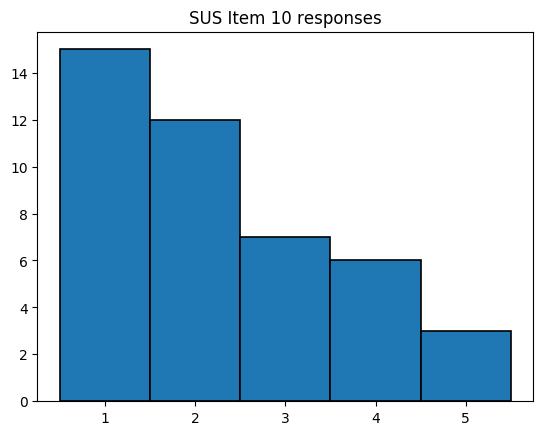

Mean: 2.3023255814


In [43]:
import matplotlib.pyplot as plt

plt.title('SUS Item 10 responses')
plt.hist(df_clean["SUS_10"], bins=np.arange(0.5, 6.5), edgecolor='black', linewidth=1.2)
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.yticks(np.arange(0, df_clean["SUS_10"].value_counts().max(), 2.0))
plt.show()

print "Mean: " + str(df_clean["SUS_10"].mean())